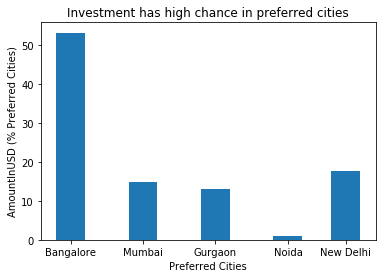

Bangalore  412
Mumbai  303
Gurgaon  166
Noida  46
New Delhi  214


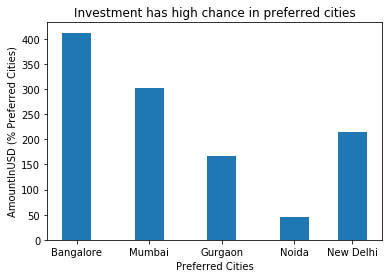

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

startUpDataSet = pd.read_csv('startup_funding.csv',encoding='utf-8')

preferredCityList = ['Bangalore','Mumbai','Gurgaon','Noida','New Delhi']

#dropna
startUpDataSet['CityLocation'].dropna(inplace=True)

def separateCity(city):
    return city.split('/')[0].strip()

startUpDataSet['CityLocation'] = startUpDataSet['CityLocation'].apply(separateCity)

#rename city names to standard one
startUpDataSet['CityLocation'].replace('Delphi','New Delhi',inplace=True)
startUpDataSet['CityLocation'].replace('bangalore','Bangalore',inplace=True)

#Convert AmountInUSD object column to numeric 
startUpDataSet['AmountInUSD'] = startUpDataSet['AmountInUSD'].apply(lambda x: float(str(x).replace(",","")))
startUpDataSet['AmountInUSD'] = pd.to_numeric(startUpDataSet['AmountInUSD'])

top_invested_cities = startUpDataSet.groupby('CityLocation')['AmountInUSD'].sum().sort_values(ascending=False)

investmentList = []
for i in preferredCityList:
    investmentList.append(top_invested_cities[i])
    #print(i,top_invested_cities[i],sep="  ")
    
#print(investmentList)
percentage = np.true_divide(investmentList,sum(investmentList))*100

y_pos = [10,35,60,85,105]

plt.bar(y_pos, percentage,width=10)
plt.xticks(y_pos, preferredCityList)
plt.ylabel('AmountInUSD (% Preferred Cities)')
plt.xlabel('Preferred Cities')
plt.title('Investment has high chance in preferred cities')

plt.show()

investmentCount = startUpDataSet.groupby('CityLocation')['AmountInUSD'].count().sort_values(ascending=False)

fundingList = []
for i in preferredCityList:
    fundingList.append(investmentCount[i])
    print(i,investmentCount[i],sep="  ")


y_pos = [10,35,60,85,105]

plt.bar(y_pos, fundingList,width=10)
plt.xticks(y_pos, preferredCityList)
plt.ylabel('AmountInUSD (% Preferred Cities)')
plt.xlabel('Preferred Cities')
plt.title('Investment has high chance in preferred cities')

plt.show()
    

Indian Angel Network invested 33 times as Seed Funding or Crowd Funding
Rajan Anandan invested 23 times as Seed Funding or Crowd Funding
LetsVenture invested 16 times as Seed Funding or Crowd Funding
Anupam Mittal invested 16 times as Seed Funding or Crowd Funding
Group of Angel Investors invested 14 times as Seed Funding or Crowd Funding
Question -4:--


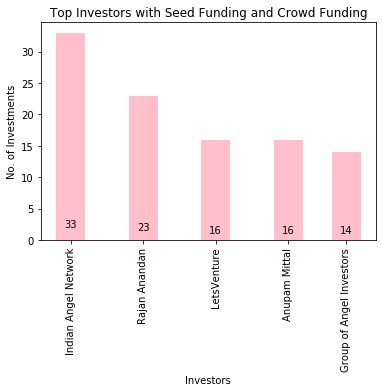

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 


startUpData = pd.read_csv("startup_funding.csv",encoding='utf-8')

##Change the important startUp name to correct name
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Flipkart.com","Flipkart")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Oyo Rooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("OyoRooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Oyorooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("OYO Rooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Paytm Marketplace","Paytm")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Ola Cabs","Ola")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Olacabs","Ola")

##Change the investmentType to appropriate value
startUpData['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)
startUpData['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
startUpData['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)

##fillna InvestorsName with -- for easy manupulation
startUpData['InvestorsName'].fillna("--",inplace=True)
startUpData['InvestmentType'].fillna("--",inplace=True)

##Multiple investors for single startup, so i have splited the those as each value
startUpData = startUpData.assign(InvestorsName=startUpData.InvestorsName.str.split(',')).explode('InvestorsName')

startUpData['InvestorsName'] = startUpData['InvestorsName'].str.strip()

##Added filter to filter the Seed Funding and Crowd Funding
seedFilter = startUpData['InvestmentType'] == 'Seed Funding'
crowdFilter = startUpData['InvestmentType'] == 'Crowd Funding'
startUpData.where(seedFilter | crowdFilter, inplace = True)

startUpData['InvestorsName'].fillna("--",inplace=True)
startUpData['InvestmentType'].fillna("--",inplace=True)

investorGroup = startUpData.groupby('InvestorsName')

uniqueInvestorList = startUpData['InvestorsName'].unique()

dictionary = {}
for investor in uniqueInvestorList:
    ##Undisclosed,-- and emnpty values are not fit for manipulation,so removing
    if investor == "--" or investor.startswith('Undisclosed') or investor == "":
        continue
    else:
        groupValue = investorGroup.get_group(investor)
        #Split investor's with number of count after filtering the seed funding and crowd funding
        count = len(groupValue['StartupName'].unique())
        dictionary[investor] = count
        

investorDataFrame = pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
investorDataFrame = investorDataFrame.sort_values(by=[0],ascending=False)
resultList = investorDataFrame[:5][0]

for index in range(5):
    print(resultList.index[index] + " invested " + str(resultList.values[index]) + " times as Seed Funding or Crowd Funding")
    
    
x_pos = [10,35,60,85,105]
print("Question -4:--")
react = plt.bar(x_pos, resultList.values,width=10,color="pink")
plt.xticks(x_pos, resultList.index,rotation=90)
plt.ylabel('No. of Investments')
plt.xlabel('Investors')
plt.title('Top Investors with Seed Funding and Crowd Funding')

for i in react:
    height = i.get_height()
    plt.text(i.get_x()+i.get_width()/2.0,.05*height,str(height),ha='center',va='bottom')

plt.show()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4577 entries, 0 to 2371
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SNo               4577 non-null   int64 
 1   Date              4577 non-null   object
 2   StartupName       4577 non-null   object
 3   IndustryVertical  4270 non-null   object
 4   SubVertical       2794 non-null   object
 5   CityLocation      4242 non-null   object
 6   InvestorsName     4577 non-null   object
 7   InvestmentType    4577 non-null   object
 8   AmountInUSD       3016 non-null   object
 9   Remarks           828 non-null    object
dtypes: int64(1), object(9)
memory usage: 393.3+ KB
None
Sequoia Capital invested 45 times as Private Funding
Accel Partners invested 43 times as Private Funding
Kalaari Capital invested 35 times as Private Funding
Blume Ventures invested 27 times as Private Funding
SAIF Partners invested 24 times as Private Funding
Question -5:--


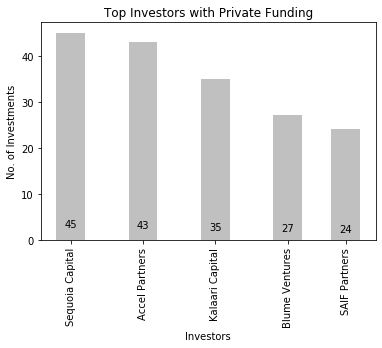

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 


startUpData = pd.read_csv("startup_funding.csv",encoding='utf-8')

##Change the important startUp name to correct name
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Flipkart.com","Flipkart")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Oyo Rooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("OyoRooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Oyorooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("OYO Rooms","Oyo")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Paytm Marketplace","Paytm")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Ola Cabs","Ola")
startUpData['StartupName'] = startUpData['StartupName'].str.replace("Olacabs","Ola")

##Change the investmentType to appropriate value
startUpData['InvestmentType'].replace("PrivateEquity","Private Equity",inplace=True)
startUpData['InvestmentType'].replace("SeedFunding","Seed Funding",inplace=True)
startUpData['InvestmentType'].replace("Crowd funding","Crowd Funding",inplace=True)

##fillna InvestorsName with -- for easy manupulation
startUpData['InvestorsName'].fillna("--",inplace=True)
startUpData['InvestmentType'].fillna("--",inplace=True)

##Multiple investors for single startup, so i have splited the those as each value
startUpData = startUpData.assign(InvestorsName=startUpData.InvestorsName.str.split(',')).explode('InvestorsName')

startUpData['InvestorsName'] = startUpData['InvestorsName'].str.strip()


##Added filter to filter the Private Funding
privateFilter = startUpData['InvestmentType'] == 'Private Equity'
startUpData.where(privateFilter, inplace = True)

startUpData['InvestorsName'].fillna("--",inplace=True)
startUpData['InvestmentType'].fillna("--",inplace=True)

uniqueInvestorList = startUpData['InvestorsName'].unique()

investorGroup = startUpData.groupby('InvestorsName')

dictionary = {}
for investor in uniqueInvestorList:
    ##Undisclosed,-- and emnpty values are not fit for manipulation,so removing
    if investor == "--" or investor.startswith('Undisclosed') or investor == "":
        continue
    else:
        groupValue = investorGroup.get_group(investor)
        #Split investor's with number of count after filtering the private funding.
        count = len(groupValue['StartupName'].unique())
        dictionary[investor] = count
        

investorDataFrame = pd.DataFrame(list(dictionary.values()),list(dictionary.keys()))
investorDataFrame = investorDataFrame.sort_values(by=[0],ascending=False)
resultList = investorDataFrame[:5][0]

for index in range(5):
    print(resultList.index[index] + " invested " + str(resultList.values[index]) + " times as Private Funding")
    
    
x_pos = [10,35,60,85,105]
print("Question -5:--")
react = plt.bar(x_pos, resultList.values,width=10,color="silver")
plt.xticks(x_pos, resultList.index,rotation=90)
plt.ylabel('No. of Investments')
plt.xlabel('Investors')
plt.title('Top Investors with Private Funding')

for i in react:
    height = i.get_height()
    plt.text(i.get_x()+i.get_width()/2.0,.05*height,str(height),ha='center',va='bottom')

plt.show()    